#### R<sub>LD</sub> = 𝜎𝜀<sub>A</sub>𝑇<sub>a</sub><sup>4</sup>
<br>
𝜀<sub>A</sub>=1 - (1+ζ)exp(-(C+Dζ)<sup>0.5</sup>)
<br><br>
𝜎 is 5.67 × 10<sup>-8</sup> J s<sup>-1</sup> m<sup>-2</sup> K<sup>-4</sup><br>
𝜀<sub>A</sub> is the atmospheric emissivity<br>
ζ is total atmospheric precipitable water from MOD05 and MYD05<br>
𝑇<sub>A</sub> is near surface air temperature (K)

In [1]:
import os
import numpy
import matplotlib.pyplot as plt

In [2]:
def read_site_csv(csv_filename):
    csv_data = numpy.genfromtxt(csv_filename, delimiter=',', dtype=str)
    csv_v = csv_data[:, 1]
    csv_v = csv_v.astype(float)
    return csv_data[:, 0], csv_v


def daily_to_10min(daily_v):
    tenmin_v = numpy.repeat(daily_v, 24*6)
    return tenmin_v


def calculate_epsilon_a(zeta):
    C = 2.0
    D = 3.0
    epsilon_a = 1 - (1 + zeta) * numpy.exp(-numpy.sqrt(C + D * zeta))    
    return epsilon_a


def calculate_r_ld(epsilon_a, t_a):
    sigma = 5.67e-8
    r_ld = sigma * epsilon_a * t_a**4
    return r_ld

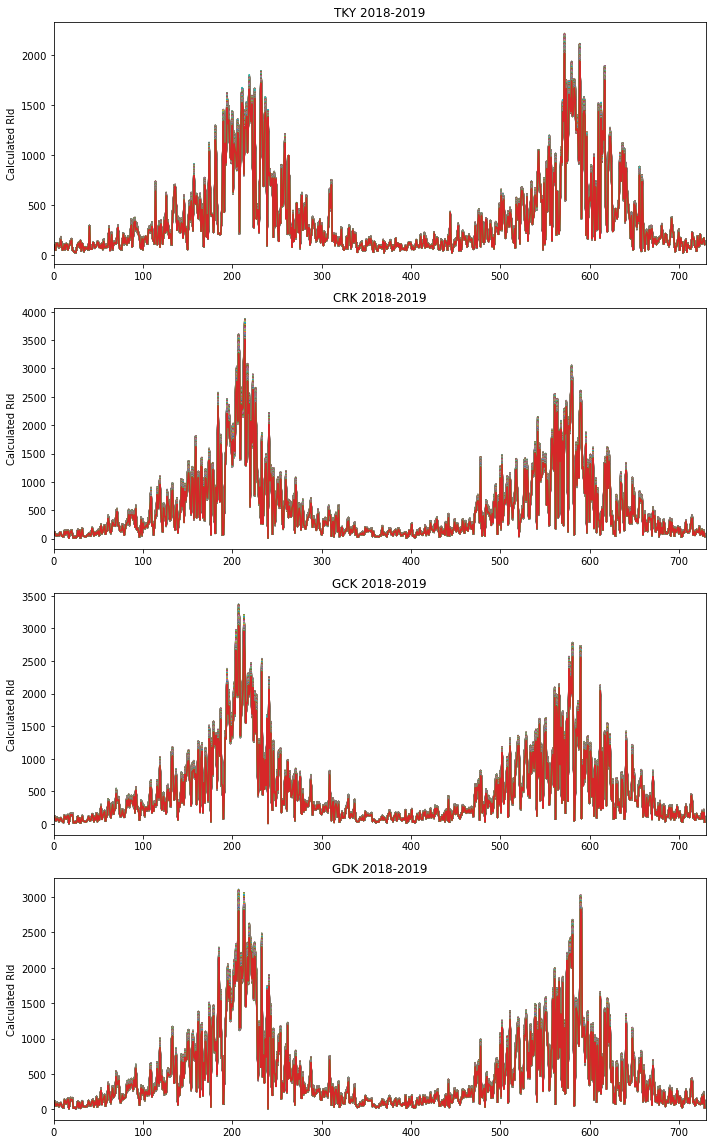

In [5]:
OUTPUT_FOLDER = '/disk2/Data/FluxSite4ET'

site_names = ['TKY', 'CRK', 'GCK', 'GDK']

fig, axes = plt.subplots(len(site_names), 1, figsize=(10, 4 * len(site_names)))    

for i, site_name in enumerate(site_names):
    Ta_SITE_CSV = '/disk2/Data/FluxSite4ET/' + site_name + '_AMATERASS_Ta.csv'
    ta_timelist, ta_10min = read_site_csv(Ta_SITE_CSV)
    WV_SITE_CSV = '/disk2/Data/FluxSite4ET/' + site_name + '_MODIS05_TPWV.csv'
    wv_timelist, wv_1d = read_site_csv(WV_SITE_CSV)
    wv_10min = daily_to_10min(wv_1d)
    r_ld_10min = calculate_r_ld(wv_10min, ta_10min)
    
    r_ld_record = r_ld_10min.astype(str)
    r_ld_csv_ = numpy.column_stack((ta_timelist, r_ld_record))
    numpy.savetxt(os.path.join(OUTPUT_FOLDER, site_name+'_Rld'+'.csv'), r_ld_csv_, delimiter=",", fmt='%s')

    data_day = r_ld_10min.reshape(365 * 2, 24 * 6)
    
    axes[i].plot(numpy.arange(365 * 2), data_day)
    axes[i].set_title(site_name + ' 2018-2019')
    axes[i].set_xlim(0, 365 * 2)
    axes[i].set_ylabel('Calculated Rld')

plt.tight_layout()
plt.show()